In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas
from folium import plugins

In [2]:
climate_data = pd.read_csv('/Users/sbp/Downloads/historical_emissions.csv')

In [3]:
climate_data.shape # print rows, columns


(4522, 14)

In [4]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4522 entries, 0 to 4521
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      4522 non-null   object 
 1   Data source  4522 non-null   object 
 2   Sector       4522 non-null   object 
 3   Gas          4522 non-null   object 
 4   Unit         4522 non-null   object 
 5   2019         4518 non-null   float64
 6   2018         4518 non-null   float64
 7   2017         4518 non-null   float64
 8   2016         4520 non-null   float64
 9   2015         4518 non-null   float64
 10  2014         4518 non-null   float64
 11  2013         4518 non-null   float64
 12  2012         4512 non-null   float64
 13  2011         4502 non-null   float64
dtypes: float64(9), object(5)
memory usage: 494.7+ KB


In [5]:
#check for missing values
climate_data.isnull().values.any()

True

In [6]:
#Find the sum of missing values in the dataset
climate_data.isnull().sum()

Country         0
Data source     0
Sector          0
Gas             0
Unit            0
2019            4
2018            4
2017            4
2016            2
2015            4
2014            4
2013            4
2012           10
2011           20
dtype: int64

In [7]:
#Percentage of missing values
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(climate_data)

2019 => 0.09%
2018 => 0.09%
2017 => 0.09%
2016 => 0.04%
2015 => 0.09%
2014 => 0.09%
2013 => 0.09%
2012 => 0.22%
2011 => 0.44%


In [8]:
#The above shows that there not much missing values in the given dataset, instead of dropping the records
# let's impute values to those empty cells
# imputing price with mean
mean_value = round(climate_data['2012'].mean(), 2)
climate_data['2012'].fillna(mean_value, inplace=True)

mean_value = round(climate_data['2011'].mean(), 2)
climate_data['2011'].fillna(mean_value, inplace=True)

mean_value = round(climate_data['2013'].mean(), 2)
climate_data['2013'].fillna(mean_value, inplace=True)

mean_value = round(climate_data['2014'].mean(), 2)
climate_data['2014'].fillna(mean_value, inplace=True)

mean_value = round(climate_data['2015'].mean(), 2)
climate_data['2015'].fillna(mean_value, inplace=True)

mean_value = round(climate_data['2016'].mean(), 2)
climate_data['2016'].fillna(mean_value, inplace=True)

mean_value = round(climate_data['2017'].mean(), 2)
climate_data['2017'].fillna(mean_value, inplace=True)

mean_value = round(climate_data['2018'].mean(), 2)
climate_data['2018'].fillna(mean_value, inplace=True)

mean_value = round(climate_data['2019'].mean(), 2)
climate_data['2019'].fillna(mean_value, inplace=True)


In [9]:
#Find the sum of missing values in the dataset
climate_data.isnull().sum()

Country        0
Data source    0
Sector         0
Gas            0
Unit           0
2019           0
2018           0
2017           0
2016           0
2015           0
2014           0
2013           0
2012           0
2011           0
dtype: int64

In [10]:
#Check for the duplicates
climate_data.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
4517    False
4518    False
4519    False
4520    False
4521    False
Length: 4522, dtype: bool

In [11]:
#before that let's transform the data to required format
climate_data.columns

Index(['Country', 'Data source', 'Sector', 'Gas', 'Unit', '2019', '2018',
       '2017', '2016', '2015', '2014', '2013', '2012', '2011'],
      dtype='object')

In [12]:
cd = climate_data.melt(id_vars=['Country', 'Data source', 'Sector', 'Gas', 'Unit'], value_vars=['2019', '2018',
       '2017', '2016', '2015', '2014', '2013', '2012', '2011'],var_name="Year", value_name="Emission")

In [13]:
cd
cd.to_csv('/Users/sbp/Downloads/cluster_datav3.csv')

In [14]:
cd.columns # print rows, columns


Index(['Country', 'Data source', 'Sector', 'Gas', 'Unit', 'Year', 'Emission'], dtype='object')

In [15]:
#Check for Outliers
cd.describe()

Emission
count  40698.000000
mean      32.393856
std      588.586699
min     -710.170000
25%        0.000000
50%        0.060000
75%        1.620000
max    33909.890000

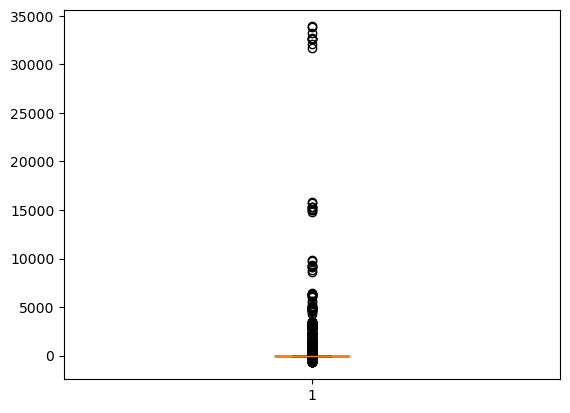

In [16]:
plt.boxplot(cd["Emission"])
plt.show()


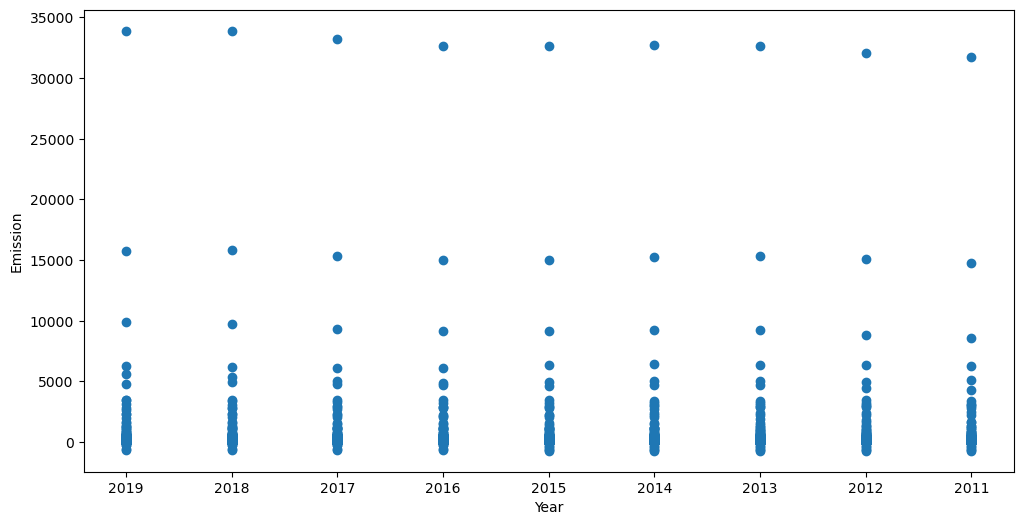

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(cd['Year'], cd['Emission'])
ax.set_xlabel('Year')
ax.set_ylabel('Emission')
plt.show()


In [18]:
#Data Visualizations
#read the data and infromation available in the given dataset
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40698 entries, 0 to 40697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      40698 non-null  object 
 1   Data source  40698 non-null  object 
 2   Sector       40698 non-null  object 
 3   Gas          40698 non-null  object 
 4   Unit         40698 non-null  object 
 5   Year         40698 non-null  object 
 6   Emission     40698 non-null  float64
dtypes: float64(1), object(6)
memory usage: 2.2+ MB


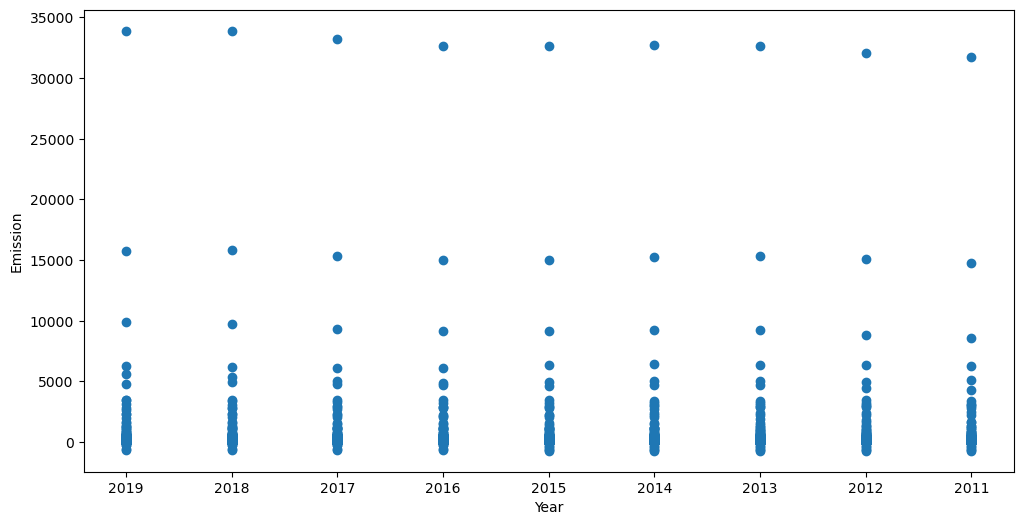

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(cd['Year'], cd['Emission'])
ax.set_xlabel('Year')
ax.set_ylabel('Emission')
plt.show()


In [20]:
cd['Gas'].unique()

array(['CO2', 'CH4', 'N2O', 'F-Gas'], dtype=object)

In [21]:
ghg = cd.loc[(cd['Gas'] == 'CO2')]

In [22]:
topghg=ghg.groupby('Country', as_index=False).agg({'Emission': 'median'}).sort_values('Emission', ascending=False).head(10)
topghg.sort_values('Emission', ascending=False)

# Let's calculate the median value of GHG emission for the last 10 year for all countries for comparison

ghg=ghg[ghg['Year']>='2010']
medianghg=ghg.median()

t=[]
for c in topghg['Country']:
    if c not in t:
        t.append(c)
t

/var/folders/pt/ryx7csd94r120rs5zhjc4hpw0000gn/T/ipykernel_74688/1797863855.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medianghg=ghg.median()


['World',
 'China',
 'European Union (27)',
 'United States',
 'India',
 'Japan',
 'Indonesia',
 'Brazil',
 'Canada',
 'United Arab Emirates']

In [23]:
ct=ghg[ghg['Country'].isin(t)]

fig = px.bar(ct, x='Sector', y='Emission', color='Country',
             animation_frame="Year", 
             animation_group="Country", 
             range_y=[0, 500], 
             title=('Total CO2 emissions: top 10 emitters<br><sup>China and the USA are leading the list with the highest GHG emissions levels</sup>'),
             labels={'ghg': 'Greenhouse gases emissions, ', 'Country': 'Region'})
plt.tight_layout()                
fig.show()

<Figure size 640x480 with 0 Axes>

In [24]:
ct=ghg[ghg['Country'].isin(t)]

fig = px.bar(ct, x='Country', y='Emission', color='Country',
             animation_frame="Year", 
             animation_group="Country", 
             range_y=[0, 500], 
             title=('Total CO2 emissions: top 10 emitters<br><sup>China and the USA are leading the list with the highest GHG emissions levels</sup>'),
             labels={'ghg': 'Greenhouse gases emissions, ', 'Country': 'Region'})
plt.tight_layout()                
fig.show()
#fig.write_image('/Users/sbp/Downloads/img3.png')

<Figure size 640x480 with 0 Axes>

In [25]:
methane = cd.loc[(cd['Gas'] == 'CH4')]

In [26]:
topghg=methane.groupby('Country', as_index=False).agg({'Emission': 'median'}).sort_values('Emission', ascending=False).head(10)
topghg.sort_values('Emission', ascending=False)

# Let's calculate the median value of GHG emission for the last 10 year for all countries for comparison

methane=methane[methane['Year']>='2010']
medianghg=methane.median()

t=[]
for c in topghg['Country']:
    if c not in t:
        t.append(c)
t

/var/folders/pt/ryx7csd94r120rs5zhjc4hpw0000gn/T/ipykernel_74688/418198984.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



['World',
 'Indonesia',
 'China',
 'India',
 'Angola',
 'Brazil',
 'European Union (27)',
 'United States',
 'Russia',
 'Democratic Republic of the Congo']

In [27]:
ct=methane[methane['Country'].isin(t)]

fig = px.bar(ct, x='Country', y='Emission', color='Country',
             animation_frame="Year", 
             animation_group="Country", 
             range_y=[0, 500], 
             title=('Total Methane emissions: top 10 emitters'),
             labels={'ghg': 'Greenhouse gases emissions, ', 'Country': 'Region'})
plt.tight_layout()                
fig.show()
fig.write_image('/Users/sbp/Downloads/img5.png')

<Figure size 640x480 with 0 Axes>

In [28]:
nitrogen = cd.loc[(cd['Gas'] == 'N2O')]

In [29]:
topghg=nitrogen.groupby('Country', as_index=False).agg({'Emission': 'median'}).sort_values('Emission', ascending=False).head(10)
topghg.sort_values('Emission', ascending=False)

# Let's calculate the median value of GHG emission for the last 10 year for all countries for comparison

nitrogen=nitrogen[nitrogen['Year']>='2010']
medianghg=nitrogen.median()

t=[]
for c in topghg['Country']:
    if c not in t:
        t.append(c)
t

/var/folders/pt/ryx7csd94r120rs5zhjc4hpw0000gn/T/ipykernel_74688/2327062872.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



['World',
 'China',
 'United States',
 'India',
 'European Union (27)',
 'Russia',
 'Brazil',
 'Japan',
 'Australia',
 'Germany']

In [30]:
ct=nitrogen[nitrogen['Country'].isin(t)]

fig = px.bar(ct, x='Country', y='Emission', color='Country',
             animation_frame="Year", 
             animation_group="Country", 
             range_y=[0, 500], 
             title=('Total Nitrogen Gas emissions: top 10 emitters'),
             labels={'N2O': 'Nitrogen gases emissions, ', 'Country': 'Region'})
plt.tight_layout()                
fig.show()
fig.write_image('/Users/sbp/Downloads/img6.png')

<Figure size 640x480 with 0 Axes>

In [31]:
fgas = cd.loc[(cd['Gas'] == 'F-Gas')]

In [32]:
topghg=fgas.groupby('Country', as_index=False).agg({'Emission': 'median'}).sort_values('Emission', ascending=False).head(10)
topghg.sort_values('Emission', ascending=False)

# Let's calculate the median value of GHG emission for the last 10 year for all countries for comparison

fgas=fgas[fgas['Year']>='2010']
medianghg=fgas.median()

t=[]
for c in topghg['Country']:
    if c not in t:
        t.append(c)
t

/var/folders/pt/ryx7csd94r120rs5zhjc4hpw0000gn/T/ipykernel_74688/3986017874.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



['World',
 'China',
 'United States',
 'European Union (27)',
 'Saudi Arabia',
 'South Korea',
 'Japan',
 'Thailand',
 'Russia',
 'France']

In [33]:
ct=fgas[fgas['Country'].isin(t)]

fig = px.bar(ct, x='Country', y='Emission', color='Country',
             animation_frame="Year", 
             animation_group="Country", 
             range_y=[0, 500], 
             title=('Total F-Gas emissions: top 10 emitters'),
             labels={'F Gas': 'F Gas gases emissions, ', 'Country': 'Region'})
plt.tight_layout()                
fig.show()
fig.write_image('/Users/sbp/Downloads/img7.png')

<Figure size 640x480 with 0 Axes>

In [34]:
# fig = px.choropleth(ghg,
#                     locations='Country',
#                     locationmode='country names',
#                     color='Gas',  # we indicate the year we are interested in
#                     hover_name='Country',                    
#                     title = 'Gas Emissions',
#                     color_continuous_scale='reds'
#                    )

# # Adjusting map, legend, title placement
# fig.update_layout(
#     autosize=False,
#     width=1200,
#     height=600,
#     margin=dict(
#         l=50,
#         r=50,
#         b=100,
#         t=100,
#         pad=4
#     ),
#     template='seaborn',
#     paper_bgcolor="rgb(255, 255, 255)",
#     legend=dict(
#         orientation="v",
#         yanchor="auto",
#         y=1,
#         xanchor="right",
#         x=1
# ))
 
# fig.show()


In [35]:
#seccar = cd.loc[(cd['Gas'] == 'CO2')]


In [36]:
#seccar['Sector'].unique()

In [37]:
cd.Gas.unique()

array(['CO2', 'CH4', 'N2O', 'F-Gas'], dtype=object)

In [38]:

df_Transmission=cd['Sector'].value_counts().reset_index().rename(columns={'index':'Sector','Sector':'Count'})
df_Transmission
fig = px.pie(df_Transmission, values='Count', names='Sector')

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')
fig.update_layout(title="Sector Transmission Distribution",title_x=0.5)
fig.show()
fig.write_image('/Users/sbp/Downloads/img8.png')

In [39]:
no2 = cd[cd.Gas == "CO2"]
no2.Sector.value_counts()

Energy                          1755
Industrial Processes            1755
Land-Use Change and Forestry    1755
Electricity/Heat                1728
Manufacturing/Construction      1728
Bunker Fuels                    1728
Fugitive Emissions               666
Name: Sector, dtype: int64

In [40]:
df_Transmission=no2['Sector'].value_counts().reset_index().rename(columns={'index':'Sector','Sector':'Count'})
df_Transmission
fig = px.pie(df_Transmission, values='Count', names='Sector')

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')
fig.update_layout(title="CO2 Transmission Distribution",title_x=0.5)
fig.show()
plt.savefig('/Users/sbp/Downloads/img12.png')

<Figure size 640x480 with 0 Axes>

In [41]:
cd.drop(cd[cd['Country'] == 'World'].index, inplace = True)
cd.Gas.unique()

array(['CO2', 'CH4', 'N2O', 'F-Gas'], dtype=object)

In [42]:
mgas = cd.loc[(cd['Gas'] == 'F-Gas')]

In [43]:
topghg=mgas.groupby('Country', as_index=False).agg({'Emission': 'median'}).sort_values('Emission', ascending=False).head(10)
topghg.sort_values('Emission', ascending=False)

# Let's calculate the median value of GHG emission for the last 10 year for all countries for comparison

fgas=fgas[fgas['Year']>='2010']
medianghg=fgas.median()

t=[]
for c in topghg['Country']:
    if c not in t:
        t.append(c)
t

/var/folders/pt/ryx7csd94r120rs5zhjc4hpw0000gn/T/ipykernel_74688/2486775926.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



['China',
 'United States',
 'European Union (27)',
 'Saudi Arabia',
 'South Korea',
 'Japan',
 'Thailand',
 'Russia',
 'France',
 'Argentina']

In [44]:
ct=fgas[fgas['Country'].isin(t)]

fig = px.bar(ct, x='Country', y='Emission', color='Country',
             animation_frame="Year", 
             animation_group="Country", 
             range_y=[0, 500], 
             title=('Total N2O emissions: top 10 emitters'),
             labels={'F Gas': 'F Gas gases emissions, ', 'Country': 'Region'})
plt.tight_layout()                
fig.show()
fig.write_image('/Users/sbp/Downloads/nn4.png')

<Figure size 640x480 with 0 Axes>

In [45]:
cd.head()

Country    Data source                      Sector  Gas  \
2                 China  Climate Watch                      Energy  CO2   
4                 China  Climate Watch            Electricity/Heat  CO2   
5         United States  Climate Watch                      Energy  CO2   
9                 China  Climate Watch  Manufacturing/Construction  CO2   
10  European Union (27)  Climate Watch                      Energy  CO2   

      Unit  Year  Emission  
2   MtCO₂e  2019   9880.32  
4   MtCO₂e  2019   5588.07  
5   MtCO₂e  2019   4776.82  
9   MtCO₂e  2019   2774.53  
10  MtCO₂e  2019   2651.58

In [46]:
cd.shape

(40482, 7)

In [47]:
cd.head(10)

Country    Data source                      Sector  Gas  \
2                 China  Climate Watch                      Energy  CO2   
4                 China  Climate Watch            Electricity/Heat  CO2   
5         United States  Climate Watch                      Energy  CO2   
9                 China  Climate Watch  Manufacturing/Construction  CO2   
10  European Union (27)  Climate Watch                      Energy  CO2   
11                India  Climate Watch                      Energy  CO2   
13        United States  Climate Watch            Electricity/Heat  CO2   
14               Russia  Climate Watch                      Energy  CO2   
18                India  Climate Watch            Electricity/Heat  CO2   
20                Japan  Climate Watch                      Energy  CO2   

      Unit  Year  Emission  
2   MtCO₂e  2019   9880.32  
4   MtCO₂e  2019   5588.07  
5   MtCO₂e  2019   4776.82  
9   MtCO₂e  2019   2774.53  
10  MtCO₂e  2019   2651.58  
11  MtCO₂e  2019   2312.60  
13  MtCO₂e  2019   1958.27  
14  MtCO₂e  2019   1683.28  
18  MtCO₂e  2019   1237.66  
20  MtCO₂e  2019   1056.19

In [48]:
cd["Gas"].value_counts()

CH4      13851
N2O      13851
CO2      11052
F-Gas     1728
Name: Gas, dtype: int64

In [49]:
d = {}
for grp in cd.groupby("Gas"):

    d[grp[0]] = list(grp[1]["Emission"].values)
    


In [50]:
cd_transformed = pd.DataFrame(columns=list(d.keys()))

In [51]:
for key in d:   
    if (key=="CH4") or (key=="N2O"):        
        cd_transformed[key] = d[key]
    else:
        li = d[key]                
        li.extend([0] * (13851 - len(li)))
        
        cd_transformed[key] = li

In [52]:
cd_transformed

CH4      CO2   F-Gas     N2O
0      682.87  9880.32  269.67  342.82
1      629.57  5588.07  174.03  219.60
2      517.75  4776.82   80.88  179.70
3      513.72  2774.53   78.35  172.47
4      500.22  2651.58   63.24  169.34
...       ...      ...     ...     ...
13846    0.00     0.00    0.00    0.00
13847    0.00     0.00    0.00    0.00
13848    0.00     0.00    0.00    0.00
13849    0.00     0.00    0.00    0.00
13850    0.00     0.00    0.00    0.00

[13851 rows x 4 columns]

In [53]:
cd['Carbon'] = cd_transformed['CH4']
cd['Methane'] = cd_transformed['CO2']
cd['Nitrogen'] = cd_transformed['N2O']
cd['FGas'] = cd_transformed['F-Gas']

In [54]:
cd.head(10)

Country    Data source                      Sector  Gas  \
2                 China  Climate Watch                      Energy  CO2   
4                 China  Climate Watch            Electricity/Heat  CO2   
5         United States  Climate Watch                      Energy  CO2   
9                 China  Climate Watch  Manufacturing/Construction  CO2   
10  European Union (27)  Climate Watch                      Energy  CO2   
11                India  Climate Watch                      Energy  CO2   
13        United States  Climate Watch            Electricity/Heat  CO2   
14               Russia  Climate Watch                      Energy  CO2   
18                India  Climate Watch            Electricity/Heat  CO2   
20                Japan  Climate Watch                      Energy  CO2   

      Unit  Year  Emission  Carbon  Methane  Nitrogen   FGas  
2   MtCO₂e  2019   9880.32  517.75  4776.82    179.70  80.88  
4   MtCO₂e  2019   5588.07  500.22  2651.58    169.34  63.24  
5   MtCO₂e  2019   4776.82  414.50  2312.60    123.72  54.64  
9   MtCO₂e  2019   2774.53  211.92  1056.19     55.59  21.74  
10  MtCO₂e  2019   2651.58  202.14   986.20     55.52  21.65  
11  MtCO₂e  2019   2312.60  165.92   869.41     55.04  18.35  
13  MtCO₂e  2019   1958.27  135.27   826.90     45.10  16.78  
14  MtCO₂e  2019   1683.28  118.56   644.11     44.48  15.61  
18  MtCO₂e  2019   1237.66   86.56   585.71     30.95  12.51  
20  MtCO₂e  2019   1056.19   81.96   572.46     27.98  12.07

In [55]:
#group = cd['Country'].groupby(cd['Emission']).sum()
#cd['Data4'] = cd['Emission'].groupby(cd['Gas'])
# Plot the distribution of SO2 across time

# plt.figure(figsize = (10,4))
# plt.plot(df['date'], df['SO2'])
# plt.title('Distribution of SO2 From 2013 to 2017')
# plt.xlabel('Time')
# plt.ylabel('SO2 Concentration')
# plt.show()

In [56]:
cluster_dfv1 = cd.filter(['Country','Sector','Carbon','Methane','Nitrogen','FGas'], axis=1)
cluster_df = cd.filter(['Carbon','Methane','Nitrogen','FGas'], axis=1)

In [57]:
cluster_df.head()

Carbon  Methane  Nitrogen   FGas
2   517.75  4776.82    179.70  80.88
4   500.22  2651.58    169.34  63.24
5   414.50  2312.60    123.72  54.64
9   211.92  1056.19     55.59  21.74
10  202.14   986.20     55.52  21.65

In [58]:
cluster_df.shape

(40482, 4)

In [59]:
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(cluster_df)

Carbon => 66.0%
Methane => 66.0%
Nitrogen => 66.0%
FGas => 66.0%


In [60]:
df = cluster_df.dropna(how='any',axis=0) 


In [61]:
df.isnull().sum()

Carbon      0
Methane     0
Nitrogen    0
FGas        0
dtype: int64

In [62]:
df.shape

(13762, 4)

In [63]:
df.head(20)
#cluster_dfv1.to_csv('/Users/sbp/Downloads/cluster_data.csv')

Carbon  Methane  Nitrogen   FGas
2   517.75  4776.82    179.70  80.88
4   500.22  2651.58    169.34  63.24
5   414.50  2312.60    123.72  54.64
9   211.92  1056.19     55.59  21.74
10  202.14   986.20     55.52  21.65
11  165.92   869.41     55.04  18.35
13  135.27   826.90     45.10  16.78
14  118.56   644.11     44.48  15.61
18   86.56   585.71     30.95  12.51
20   81.96   572.46     27.98  12.07
21   81.60   542.94     27.64  12.07
22   79.57   499.18     26.83  10.47
23   78.48   439.05     26.45  10.06
24   72.57   433.63     25.53   9.93
25   72.25   428.41     25.39   9.85
26   72.11   413.27     23.45   9.48
27   71.38   384.31     23.27   8.37
28   71.04   383.50     23.08   7.82
29   70.79   366.42     22.59   7.63
30   69.13   363.06     21.82   7.32

In [64]:
#df2 = df.drop(["Sector"], axis=1)

In [65]:
df.describe().loc["mean","Carbon"]

6.160328440633552

In [66]:
def get_risk_factor(x_row):
    
    mean_carbon = df.describe().loc["mean","Carbon"]   
    mean_methane = df.describe().loc["mean","Methane"]
    mean_nitrogen = df.describe().loc["mean","Nitrogen"]
    mean_fgas = df.describe().loc["mean","FGas"]
    if (x_row["Carbon"] < mean_carbon-3) and (x_row["Methane"] < mean_methane-20) and(x_row["Nitrogen"] < mean_nitrogen-1) and(x_row["FGas"] < mean_fgas-0.3):
        return 1
    elif (x_row["Carbon"] > mean_carbon+1) and(x_row["Methane"] > mean_methane+5) and(x_row["Nitrogen"] > mean_nitrogen+0.5) and(x_row["FGas"] > mean_fgas+0.1):
        return 2
    elif (x_row["Carbon"] > mean_carbon+2) and(x_row["Methane"] > mean_methane+10) and(x_row["Nitrogen"] > mean_nitrogen+0.6) and(x_row["FGas"] > mean_fgas+0.2):
        return 3
            

In [67]:
df["Risk"] = df.apply(lambda x: get_risk_factor(x), axis=1)

/var/folders/pt/ryx7csd94r120rs5zhjc4hpw0000gn/T/ipykernel_74688/2687294448.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
df["Risk"].value_counts()

1.0    9254
2.0      82
Name: Risk, dtype: int64

In [69]:
#df.to_csv('/Users/sbp/Downloads/cluster_datav2.csv')

In [70]:
#df[df < 0].count()

In [71]:
cols = df.columns
df.head()

Carbon  Methane  Nitrogen   FGas  Risk
2   517.75  4776.82    179.70  80.88   2.0
4   500.22  2651.58    169.34  63.24   2.0
5   414.50  2312.60    123.72  54.64   2.0
9   211.92  1056.19     55.59  21.74   2.0
10  202.14   986.20     55.52  21.65   2.0

In [72]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(df)
X

array([[0.76372192, 0.5262593 , 0.50230608, 0.30594644, 1.        ],
       [0.73786379, 0.32242672, 0.47334731, 0.23921925, 1.        ],
       [0.61142006, 0.28991502, 0.34582809, 0.20668785, 1.        ],
       ...,
       [0.        , 0.06811268, 0.        , 0.        , 0.        ],
       [0.        , 0.06811268, 0.        , 0.        , 0.        ],
       [0.        , 0.06811268, 0.        , 0.        , 0.        ]])

In [73]:
X = pd.DataFrame(X, columns=[cols])


In [74]:
X.head()

Carbon   Methane  Nitrogen      FGas Risk
0  0.763722  0.526259  0.502306  0.305946  1.0
1  0.737864  0.322427  0.473347  0.239219  1.0
2  0.611420  0.289915  0.345828  0.206688  1.0
3  0.312599  0.169412  0.155388  0.082236  1.0
4  0.298172  0.162699  0.155192  0.081896  1.0

In [75]:
np.any(np.isnan(X))


True

In [76]:
X.dropna(inplace=True)


In [77]:
np.any(np.isnan(X))


False

In [78]:
X.shape

(9336, 5)

In [79]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(X)

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



KMeans(n_clusters=3, random_state=0)

In [80]:
kmeans.cluster_centers_


array([[3.08792567e-04, 6.80276840e-02, 1.99491424e-04, 2.00867611e-05,
        3.12250226e-17],
       [7.25182224e-02, 9.24338000e-02, 4.28461994e-02, 1.66784458e-02,
        1.00000000e+00],
       [7.04335256e-01, 3.79533684e-01, 4.40493827e-01, 2.50617844e-01,
        1.00000000e+00]])

In [81]:
kmeans.inertia_

0.5521137345189979

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

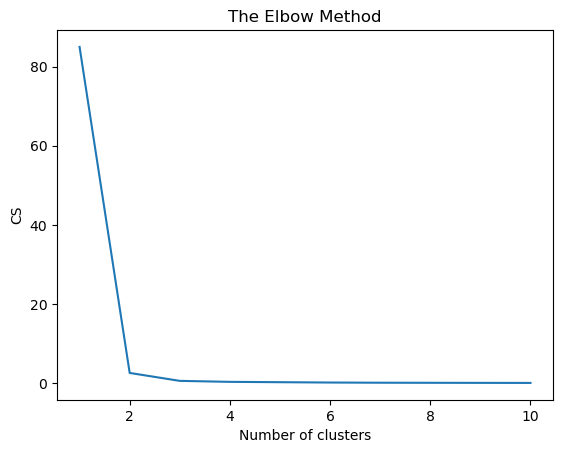

In [82]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [83]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(X) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



P1        P2
0  1.339164  0.685564
1  1.448798  0.508765

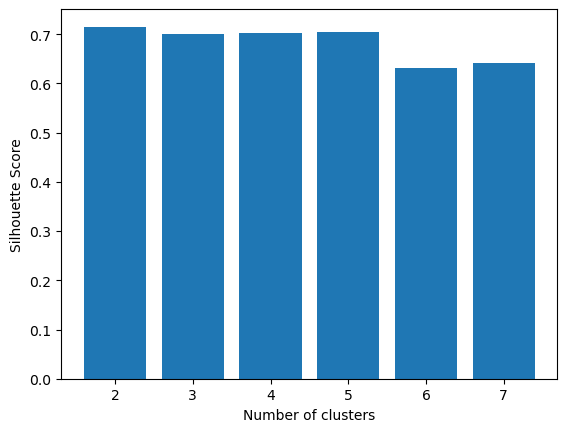

In [84]:
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

For n_clusters = 2 The average   silhoutte_score is : 0.7150660585013774


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



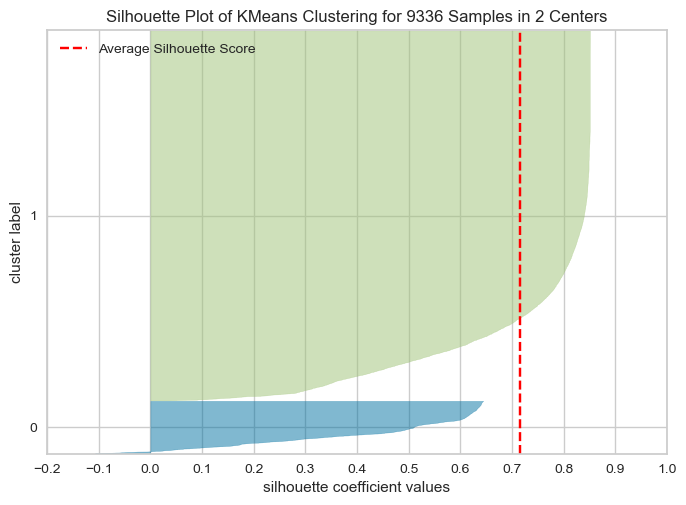

For n_clusters = 3 The average   silhoutte_score is : 0.6992879363184767


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



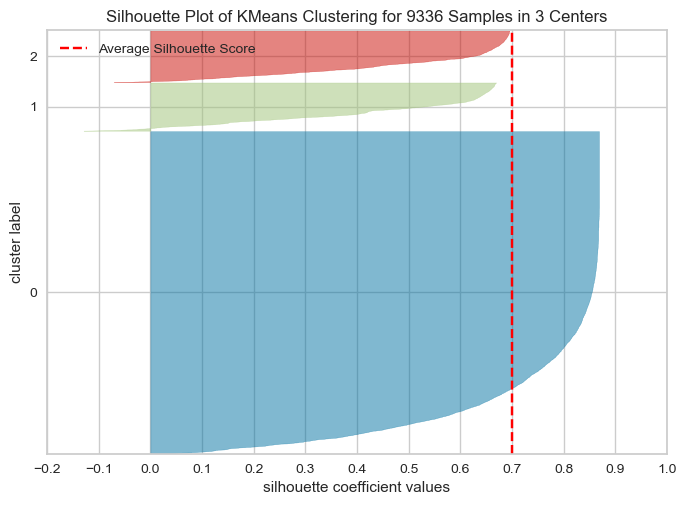

For n_clusters = 4 The average   silhoutte_score is : 0.7019123936917154


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



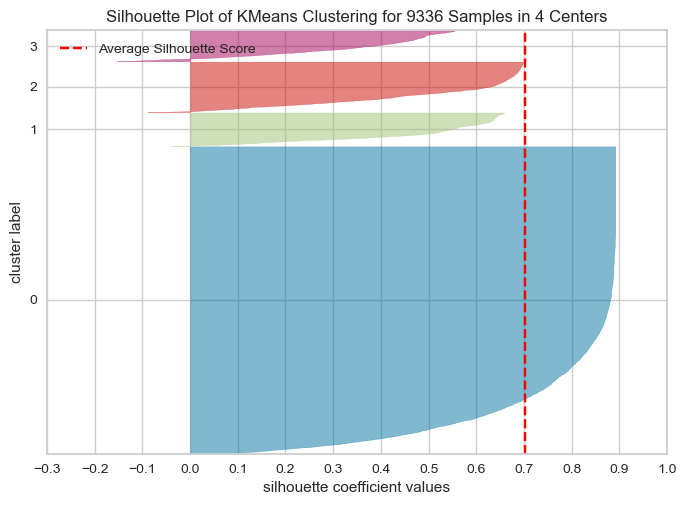

For n_clusters = 5 The average   silhoutte_score is : 0.7038196879361442


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



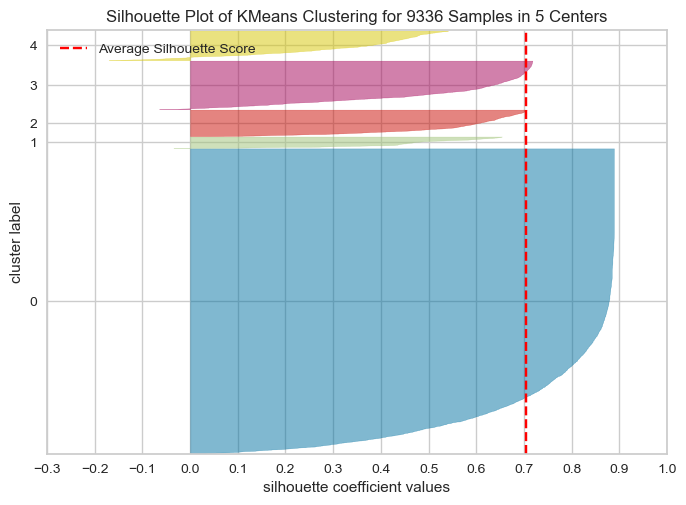

For n_clusters = 6 The average   silhoutte_score is : 0.6316351789838172


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



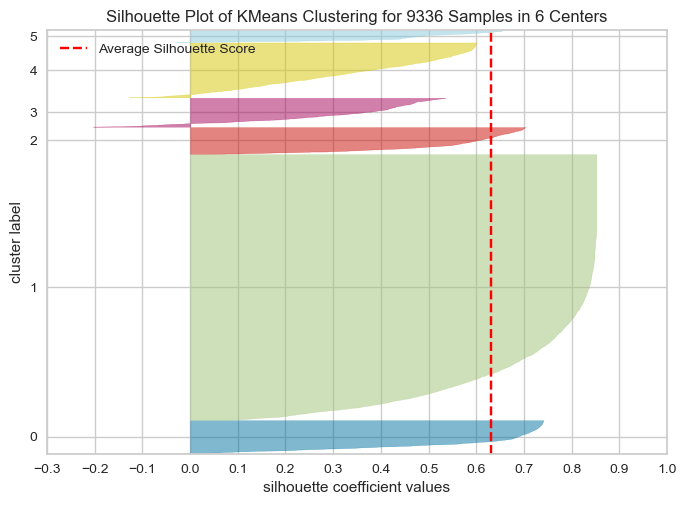

For n_clusters = 7 The average   silhoutte_score is : 0.6418511689824496


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



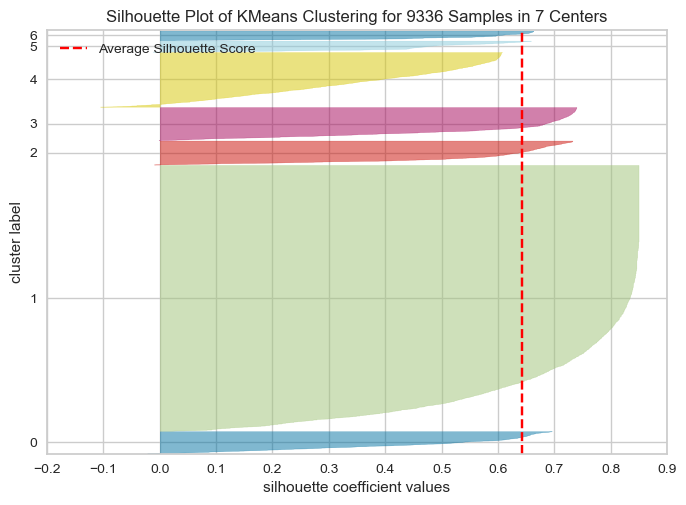

For n_clusters = 8 The average   silhoutte_score is : 0.6430084513763802


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



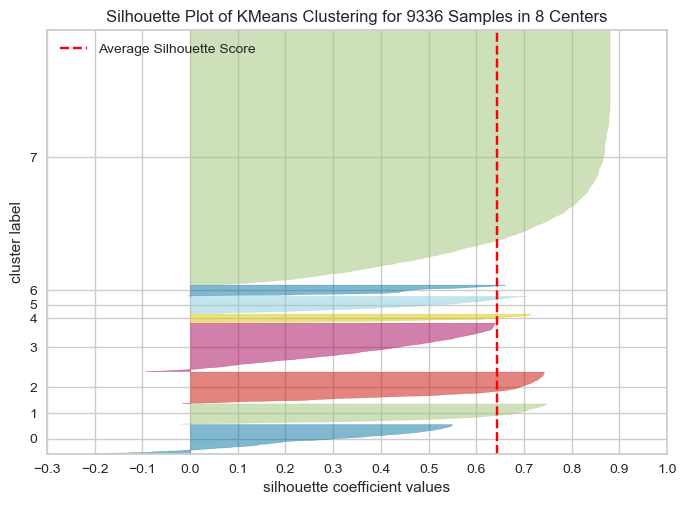

For n_clusters = 9 The average   silhoutte_score is : 0.6204236587158168


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



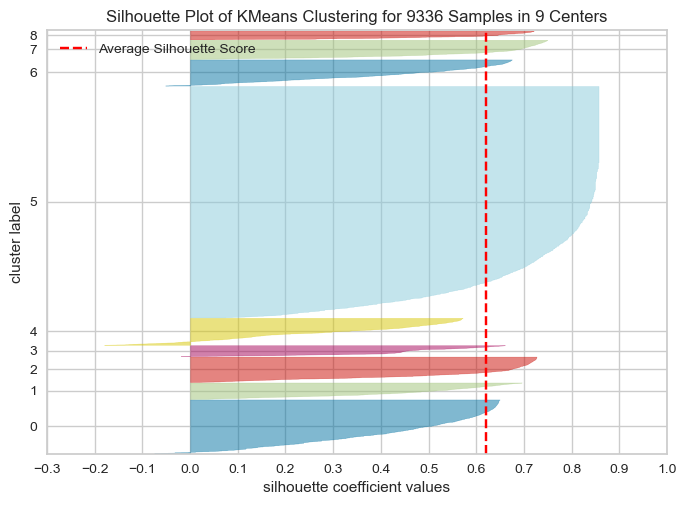

For n_clusters = 10 The average   silhoutte_score is : 0.6253876580608875


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



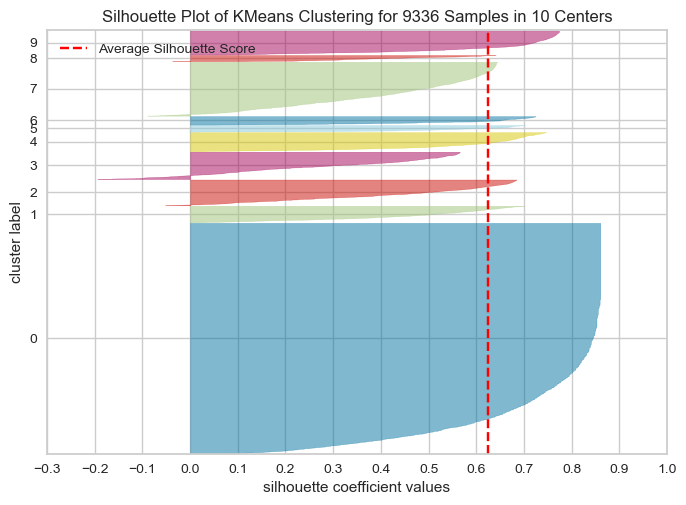

For n_clusters = 11 The average   silhoutte_score is : 0.6258488664839075


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



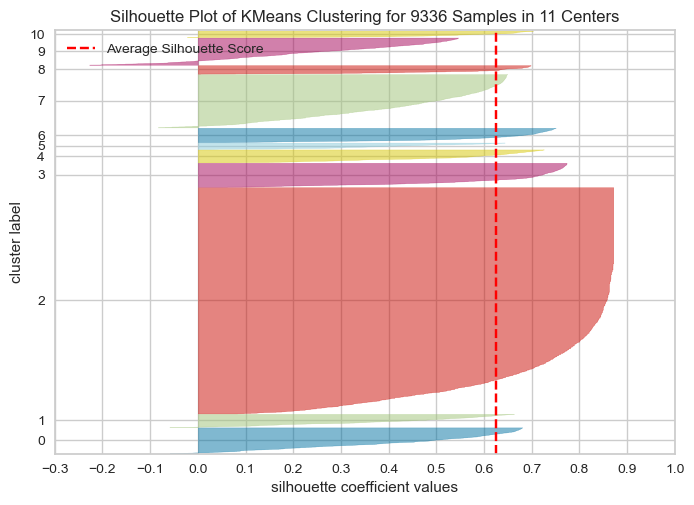

For n_clusters = 12 The average   silhoutte_score is : 0.6360394816200655


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



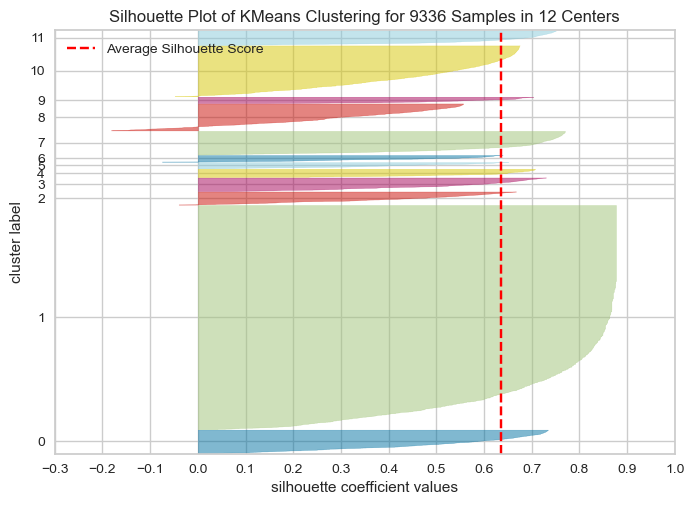

For n_clusters = 13 The average   silhoutte_score is : 0.6373742792232582


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



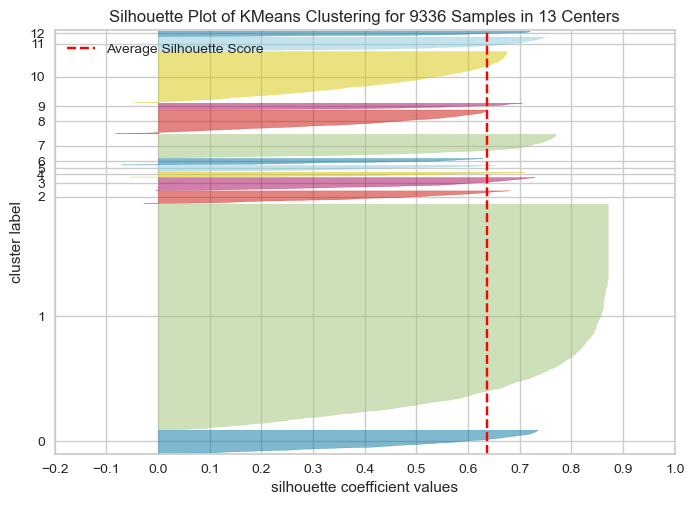

For n_clusters = 14 The average   silhoutte_score is : 0.6164590184567641


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



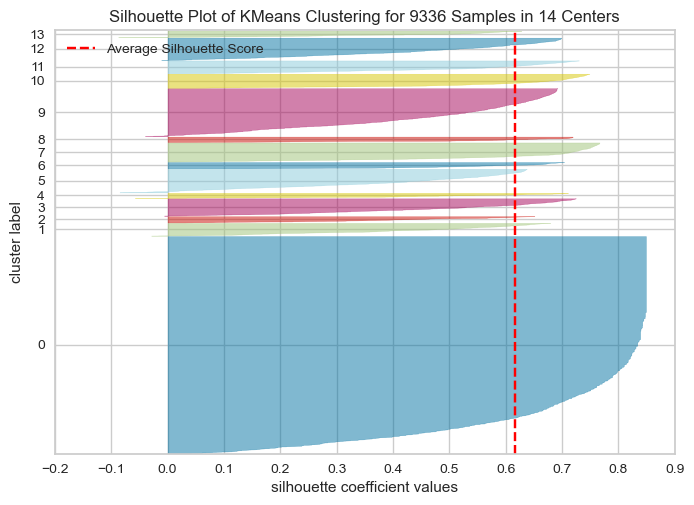

For n_clusters = 15 The average   silhoutte_score is : 0.6187586213083851


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



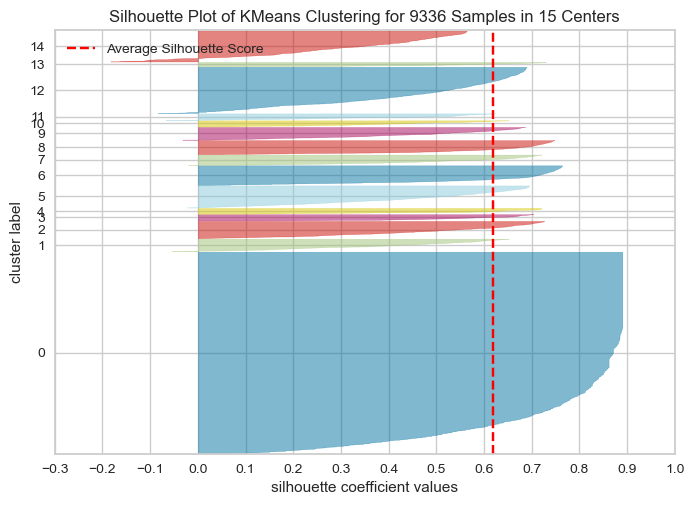

In [85]:
#import libraries
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
#Kmeans Clustering
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for n_clusters in range_n_clusters:
        #Initializing the clusterer with n_clusters value and a random   generator
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X_principal)
        #The silhouette_score gives the average value for all the   samples.
        #Calculating number of clusters
        silhouette_avg = silhouette_score(X_principal, cluster_labels)
        print("For n_clusters =", n_clusters,"The average   silhoutte_score is :", silhouette_avg)
        #Using Silhouette Plot
        visualizer = SilhouetteVisualizer(clusterer,colors =  'yellowbrick')
        #Fit the data to the visualizer
        visualizer.fit(X_principal)       
        #Render the figure
        visualizer.show()


In [103]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_principal)

KMeans(n_clusters=2)

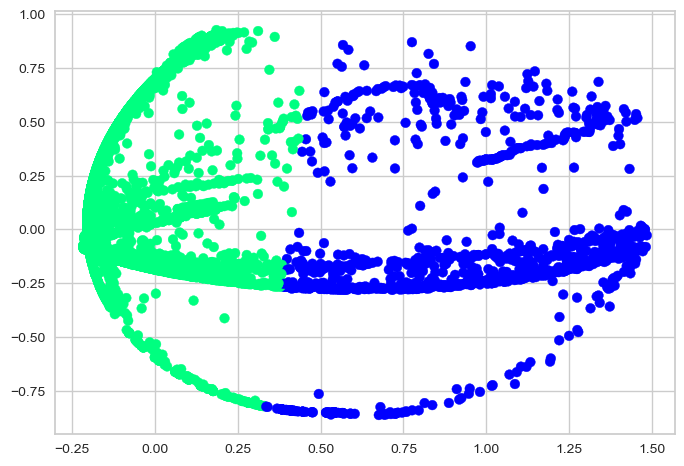

In [104]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 2).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



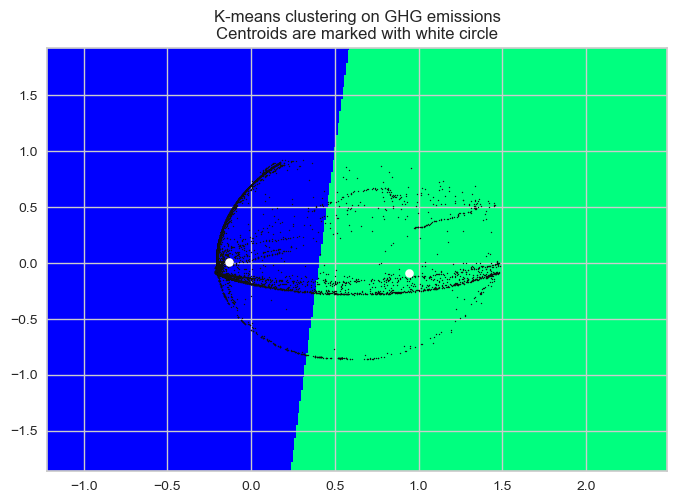

In [105]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_principal['P1'].min() - 1, X_principal['P1'].max() + 1
y_min, y_max = X_principal['P2'].min() - 1, X_principal['P2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.

# https://www.quora.com/Can-anybody-elaborate-the-use-of-c_-in-numpy
# https://www.geeksforgeeks.org/differences-flatten-ravel-numpy/
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = kmeans.predict(np.array(list(zip(xx.ravel(), yy.ravel()))))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
# https://stackoverflow.com/questions/16661790/difference-between-plt-close-and-plt-clf
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.winter,
           aspect='auto', origin='lower')

plt.plot(X_principal['P1'], X_principal['P2'], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=10, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on GHG emissions\n'
          'Centroids are marked with white circle')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [106]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Risk'] = le.fit_transform(X['Risk'])
y = le.transform(X['Risk'])
y

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([1, 1, 1, ..., 0, 0, 0])

In [107]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 8258 out of 9336 samples were correctly labeled.


In [108]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=0)

kmeans.fit(X)

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.88


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

